In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data into a dataframe
path = 'Data_Charges.csv'
dataset = pd.read_csv(path)

In [3]:
# display first 5 sample from the dataset
dataset.head()

,name,cm5,esp,npa,cm_d,cm_od1,cm_od2,cm_od3,dist1,dist2,dist3,dist4,ang1,ang2,ang3,ang4,ang5,ang6,ang_nb1,ang_nb2
0,dsgdb9nsd_000045_chrg,-0.127968,0.161540,-0.41538,36.8581,28.7951,14.5586,14.5586,1.4586,1.1066,1.0959,1.0959,1.9769,1.9048,1.9048,1.8934,1.8911,1.8911,1.9769,1.9048
1,dsgdb9nsd_000045_chrg,-0.365599,-0.318389,-0.37103,53.3587,28.7951,28.7599,28.7599,1.4604,1.4604,1.4586,0.0000,2.0212,2.0212,1.0692,0.0000,0.0000,0.0000,2.0212,2.0212
2,dsgdb9nsd_000045_chrg,-0.083152,-0.105791,-0.26367,36.8581,28.7599,24.1926,14.5586,1.4881,1.4604,1.0916,1.0881,2.1044,2.0556,2.0421,2.0214,2.0069,1.0362,1.9769,1.9048
3,dsgdb9nsd_000045_chrg,-0.083152,-0.105791,-0.26367,36.8581,28.7599,24.1926,14.5586,1.4881,1.4604,1.0916,1.0881,2.1044,2.0556,2.0421,2.0214,2.0069,1.0362,1.9769,1.9048
4,dsgdb9nsd_000045_chrg,0.078263,-0.003904,0.15869,0.5000,5.4220,3.2541,2.2732,1.1066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.9769,1.9048


In [4]:
#Summary of information on the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65076 entries, 0 to 65075
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     65076 non-null  object 
 1   cm5      65076 non-null  float64
 2   esp      65076 non-null  float64
 3   npa      65076 non-null  float64
 4   cm_d     65076 non-null  float64
 5   cm_od1   65076 non-null  float64
 6   cm_od2   65076 non-null  float64
 7   cm_od3   65076 non-null  float64
 8   dist1    65076 non-null  float64
 9   dist2    65076 non-null  float64
 10  dist3    65076 non-null  float64
 11  dist4    65076 non-null  float64
 12  ang1     65076 non-null  float64
 13  ang2     65076 non-null  float64
 14  ang3     65076 non-null  float64
 15  ang4     65076 non-null  float64
 16  ang5     65076 non-null  float64
 17  ang6     65076 non-null  float64
 18  ang_nb1  65076 non-null  float64
 19  ang_nb2  65076 non-null  float64
dtypes: float64(19), object(1)
memory usage: 9.9+ MB


In [5]:
#display theshape ofthedataset
print(f'Number of rows/examples and columns in the dataset:{dataset.shape}')

Number of rows/examples and columns in the dataset:(65076, 20)


In [7]:
#CheckingNAvalues in columns:
print("Display NA values in each column:")
dataset.isna().sum(axis=0)

Display NA values in each column:


name       0
cm5        0
esp        0
npa        0
cm_d       0
cm_od1     0
cm_od2     0
cm_od3     0
dist1      0
dist2      0
dist3      0
dist4      0
ang1       0
ang2       0
ang3       0
ang4       0
ang5       0
ang6       0
ang_nb1    0
ang_nb2    0
dtype: int64

In [9]:
# Checking NA values in rows:
print("Display NA values in each row: ")
dataset.isna().sum(axis=1)

Display NA values in each row: 


0        0
1        0
2        0
3        0
4        0
        ..
65071    0
65072    0
65073    0
65074    0
65075    0
Length: 65076, dtype: int64

In [10]:
# Checking NULL values in columns:
print("Display NULL values in each column: ")
dataset.isnull().sum()

Display NULL values in each column: 


name       0
cm5        0
esp        0
npa        0
cm_d       0
cm_od1     0
cm_od2     0
cm_od3     0
dist1      0
dist2      0
dist3      0
dist4      0
ang1       0
ang2       0
ang3       0
ang4       0
ang5       0
ang6       0
ang_nb1    0
ang_nb2    0
dtype: int64

In [11]:
# Checking NULL values in row:
print("Display NULL values in each row: ")
dataset.isnull().sum(1)

Display NULL values in each row: 


0        0
1        0
2        0
3        0
4        0
        ..
65071    0
65072    0
65073    0
65074    0
65075    0
Length: 65076, dtype: int64

In [12]:
# Display all columns
dataset.columns

Index(['name', 'cm5', 'esp', 'npa', 'cm_d', 'cm_od1', 'cm_od2', 'cm_od3',
       'dist1', 'dist2', 'dist3', 'dist4', 'ang1', 'ang2', 'ang3', 'ang4',
       'ang5', 'ang6', 'ang_nb1', 'ang_nb2'],
      dtype='object')

In [13]:
# Display statistical summary
dataset.describe()

,cm5,esp,npa,cm_d,cm_od1,cm_od2,cm_od3,dist1,dist2,dist3,dist4,ang1,ang2,ang3,ang4,ang5,ang6,ang_nb1,ang_nb2
count,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000
mean,-0.007083,-0.005845,-0.012570,18.848990,15.487923,11.557608,9.478019,1.267456,0.567704,0.433002,0.342678,0.856585,0.708414,0.684033,0.583061,0.571145,0.498479,2.030142,1.922337
std,0.160128,0.240923,0.324030,22.399193,11.821432,10.259149,8.418660,0.209114,0.685008,0.596131,0.521674,1.029945,0.960416,0.929326,0.882753,0.865421,0.774732,0.234642,0.385959
min,-0.795372,-0.982883,-1.066450,0.500000,5.277700,2.039200,1.474400,0.964300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.129085,-0.066208,-0.305503,0.500000,5.473200,2.776700,2.664800,1.095600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.943900,1.934600
50%,0.079028,0.031013,0.192690,0.500000,5.518200,3.768800,2.796400,1.100100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.951900,1.938700
75%,0.087350,0.081354,0.206373,36.858100,23.888425,23.366225,16.556725,1.520800,1.414925,1.096100,1.091400,1.965900,1.935900,1.917800,1.884400,1.873800,1.063525,1.974500,1.949200
max,0.359057,0.982023,0.820220,73.516700,40.491500,38.427400,33.348300,1.653500,1.611600,1.574300,1.545900,3.141500,2.577900,2.327800,2.260900,2.039200,1.909000,3.141500,3.141300


**Features**

In [14]:
# display the features
features = dataset.columns[4:]
print("Features ==>\n", features.tolist())

Features ==>
 ['cm_d', 'cm_od1', 'cm_od2', 'cm_od3', 'dist1', 'dist2', 'dist3', 'dist4', 'ang1', 'ang2', 'ang3', 'ang4', 'ang5', 'ang6', 'ang_nb1', 'ang_nb2']


****Features Auto correlation Heatmap****

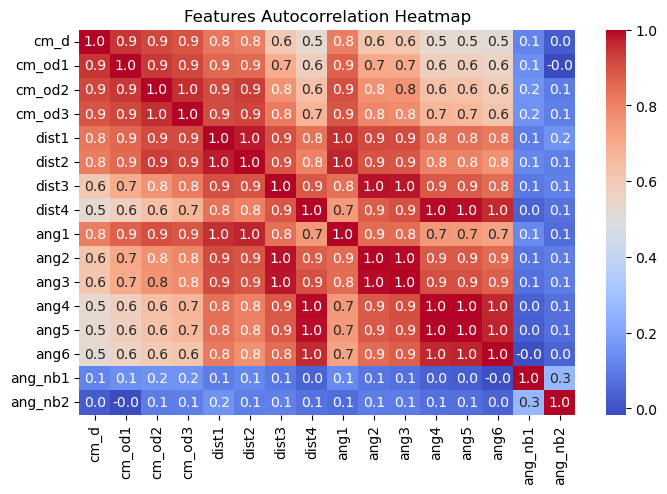

In [15]:
plt.figure(figsize = (8,5)) 
correlation_matrix = dataset.iloc[:, 4:].corr() 
sns.heatmap(correlation_matrix, cbar = True, annot = True,  
fmt=".1f", cmap='coolwarm') 
plt.title('Features Autocorrelation Heatmap') 
plt.show()

****Features Histograms with probablity density function Curve****

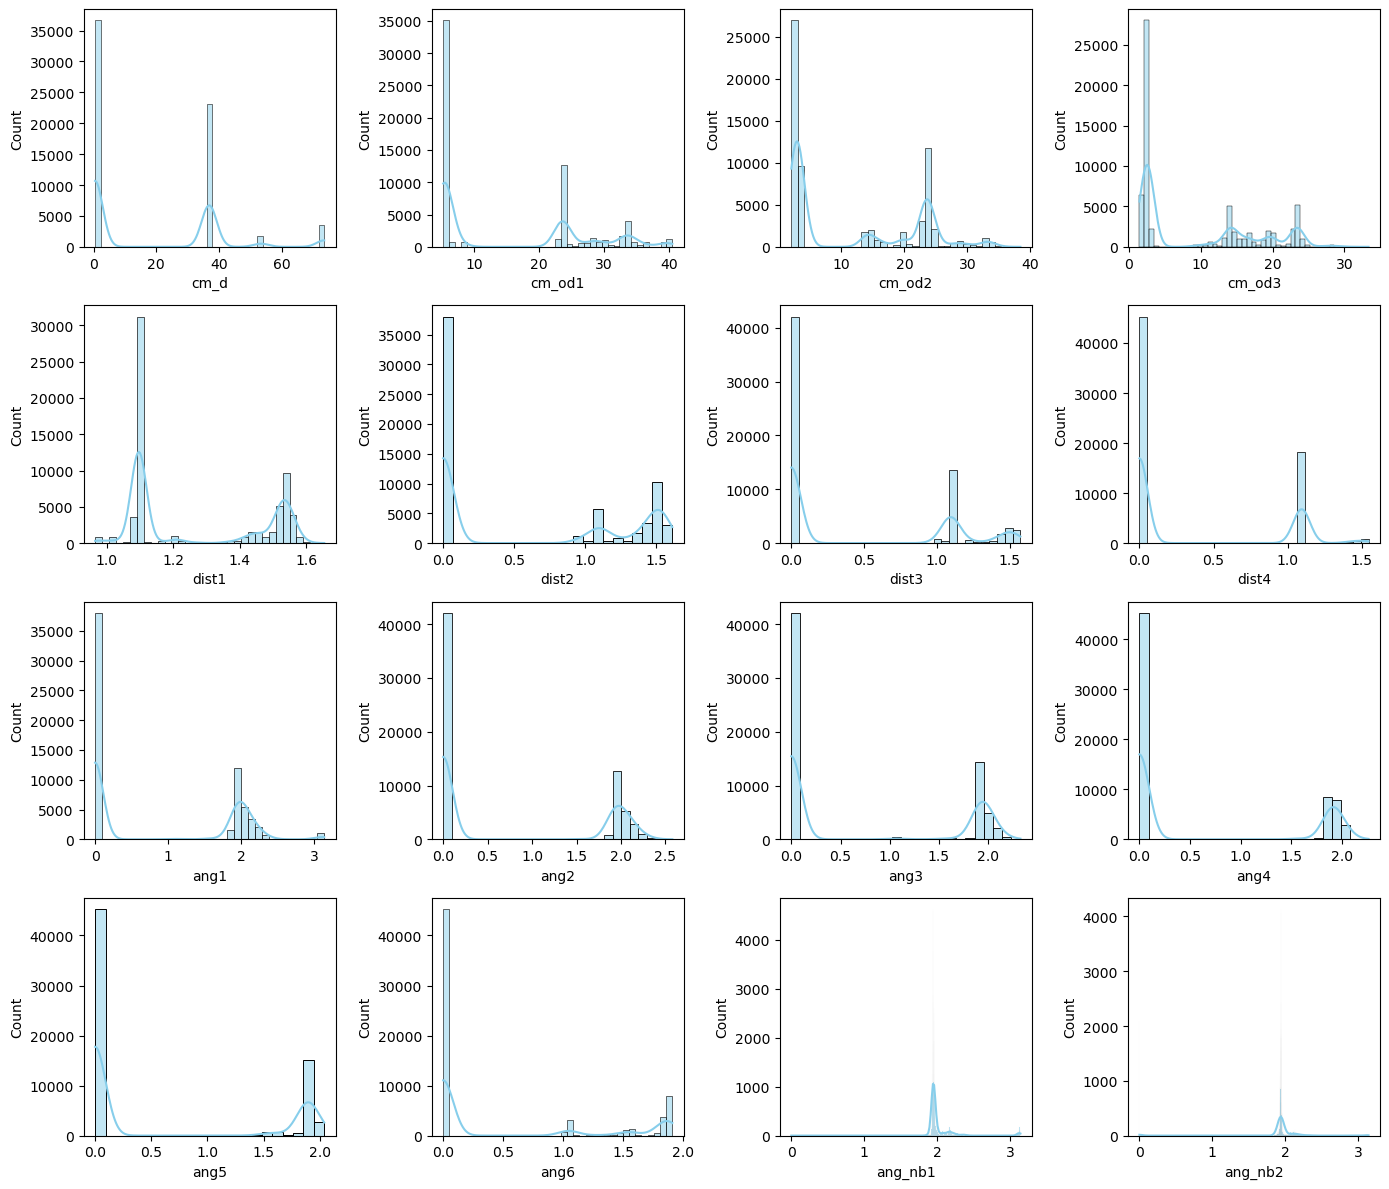

In [17]:
n_rows=4 
n_cols=4 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols) 
fig.set_size_inches(14, 12) 
for i, column in enumerate(dataset.iloc[:,4:].columns): 
    sns.histplot(dataset[column], ax=axes[i//n_cols, 
        i % n_cols], kde=True, color='skyblue') 
plt.tight_layout() 
plt.show()

**Target values (partial charges)**

In [18]:
# display the target columns
targets = dataset.columns[1:4]
print("Target molecule charges ==> ", targets.tolist())

Target molecule charges ==>  ['cm5', 'esp', 'npa']


In [19]:
# Display statistical summary of target variables
print(dataset[targets].describe())

                cm5           esp           npa
count  65076.000000  65076.000000  65076.000000
mean      -0.007083     -0.005845     -0.012570
std        0.160128      0.240923      0.324030
min       -0.795372     -0.982883     -1.066450
25%       -0.129085     -0.066208     -0.305503
50%        0.079028      0.031013      0.192690
75%        0.087350      0.081354      0.206373
max        0.359057      0.982023      0.820220


**Plotting Distributions of target molecules charges**

In [22]:
def plot_target_distribution(dataframe:pd.DataFrame,moleculecharge=1): 
    # Get name of the partial charge based on its index 
    molecule_charge_name = dataframe.columns[moleculecharge] 
    # Extract the values for the specified charge 
    values = dataframe.iloc[:, moleculecharge].sort_values().values 
    # Calculate mean and standard deviation for the molecule Charge 
    mean = values.mean() 
    std = values.std() 
    # Create a probability density function  
    pdf = scipy.stats.norm.pdf(values, loc=mean, scale=std) 
    # Plotting 
    plt.plot(values, pdf , label="Distribution curve") 
    plt.title(f'Distribution of "{molecule_charge_name}"',weight='bold') 
    plt.xlabel('Values') 
    plt.ylabel('Probability Density Function') 
    plt.xlim([-1.2,1.2]) 
    plt.grid(True, alpha=0.5, linestyle="--") 
    plt.vlines(x = mean, ymin = 0, ymax = max(pdf), 
            colors = 'red', 
            label = 'Mean Value', 
            linestyles='dashed') 
    plt.legend(loc="upper left") 
    plt.show() 
    pass 

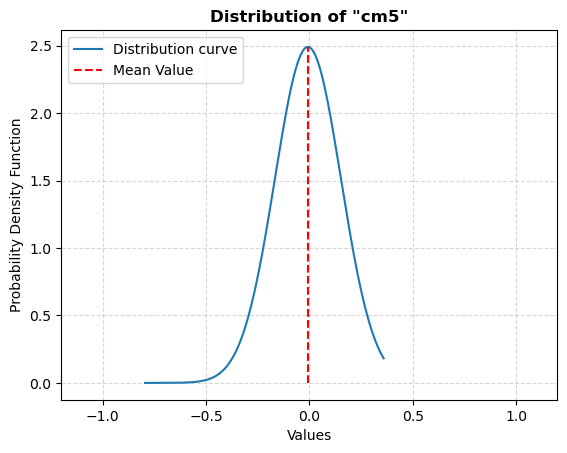

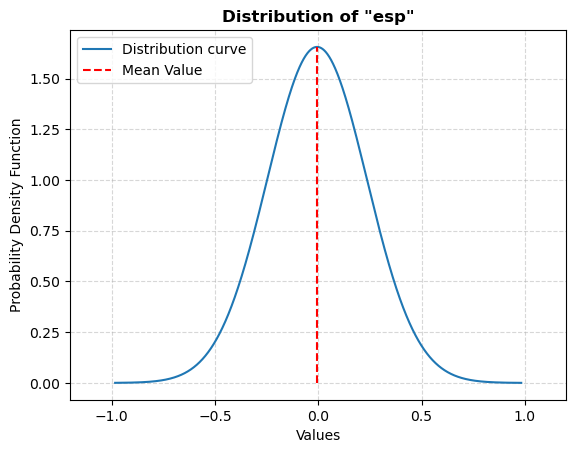

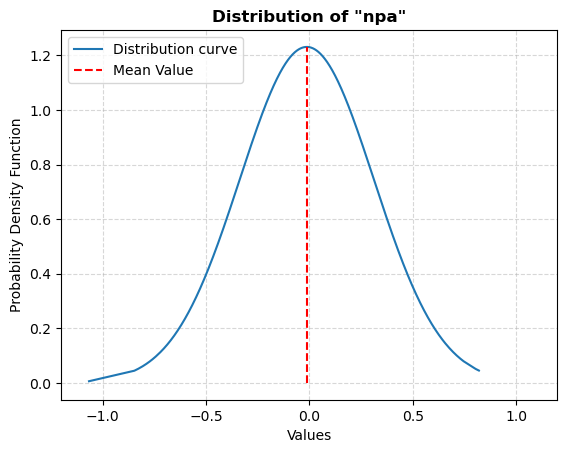

In [23]:
# Plotting the distribution for each target molecule charge 
plot_target_distribution(dataframe=dataset, moleculecharge=1) 
plot_target_distribution(dataframe=dataset, moleculecharge=2) 
plot_target_distribution(dataframe=dataset, moleculecharge=3) 

**Data normalization and splitting**

In [24]:
RANDOM_SEED = 42 
shuffled_dataset = dataset 
shuffled_dataset=shuffled_dataset.sample(frac=1,random_state=RANDOM_SEED)

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [26]:
# Create a standard scaler object 
scaler = StandardScaler() 
# select the features and scale them 
shuffled_dataset.iloc[:,4:]=scaler.fit_transform(shuffled_dataset.iloc[:,4:].values) 
# statistical summary  
shuffled_dataset.describe()

,cm5,esp,npa,cm_d,cm_od1,cm_od2,cm_od3,dist1,dist2,dist3,dist4,ang1,ang2,ang3,ang4,ang5,ang6,ang_nb1,ang_nb2
count,65076.000000,65076.000000,65076.000000,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04,6.507600e+04
mean,-0.007083,-0.005845,-0.012570,5.819646e-17,-6.223636e-17,-8.341856e-17,-1.290586e-16,-4.055190e-16,-9.521072e-17,-7.228153e-17,-2.161895e-17,-5.634029e-17,-1.489305e-16,3.515809e-17,-1.102785e-16,-1.703311e-17,4.542163e-17,6.307710e-16,-1.064569e-16
std,0.160128,0.240923,0.324030,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-0.795372,-0.982883,-1.066450,-8.191871e-01,-8.637111e-01,-9.278041e-01,-9.507072e-01,-1.449726e+00,-8.287613e-01,-7.263591e-01,-6.568870e-01,-8.316868e-01,-7.376170e-01,-7.360590e-01,-6.605073e-01,-6.599673e-01,-6.434266e-01,-8.652140e+00,-4.980715e+00
25%,-0.129085,-0.066208,-0.305503,-8.191871e-01,-8.471732e-01,-8.559165e-01,-8.093060e-01,-8.218345e-01,-8.287613e-01,-7.263591e-01,-6.568870e-01,-8.316868e-01,-7.376170e-01,-7.360590e-01,-6.605073e-01,-6.599673e-01,-6.434266e-01,-3.675508e-01,3.177222e-02
50%,0.079028,0.031013,0.192690,-8.191871e-01,-8.433665e-01,-7.592119e-01,-7.936739e-01,-8.003149e-01,-8.287613e-01,-7.263591e-01,-6.568870e-01,-8.316868e-01,-7.376170e-01,-7.360590e-01,-6.605073e-01,-6.599673e-01,-6.434266e-01,-3.334561e-01,4.239519e-02
75%,0.087350,0.081354,0.206373,8.040133e-01,7.106217e-01,1.151042e+00,8.408417e-01,1.211521e+00,1.236814e+00,1.112344e+00,1.435239e+00,1.077070e+00,1.278088e+00,1.327604e+00,1.474194e+00,1.505238e+00,7.293493e-01,-2.371385e-01,6.960036e-02
max,0.359057,0.982023,0.820220,2.440629e+00,2.115122e+00,2.619125e+00,2.835423e+00,1.846107e+00,1.523929e+00,1.914523e+00,2.306479e+00,2.218499e+00,1.946554e+00,1.768787e+00,1.900704e+00,1.696361e+00,1.820671e+00,4.736428e+00,3.158294e+00


In [27]:
features = shuffled_dataset.drop(['name', 'cm5', 'esp','npa'],axis=1)

In [28]:
labels = shuffled_dataset[['cm5', 'esp', 'npa']]

In [29]:
# first split: splitting the data into 80%/20%
x_train, x_temp, y_train, y_temp = train_test_split(features, labels, train_size=0.80, random_state=42)

In [30]:
# second split: further splitting the 20% dataset into 10%/10%
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [31]:
print("Training Features Shape:", x_train.shape) 
print("Training Labels Shape:", y_train.shape) 
print("Validation Features Shape:", x_val.shape) 
print("Validation Labels Shape:", y_val.shape) 
print("Test Features Shape:", x_test.shape) 
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (52060, 16)
Training Labels Shape: (52060, 3)
Validation Features Shape: (6508, 16)
Validation Labels Shape: (6508, 3)
Test Features Shape: (6508, 16)
Test Labels Shape: (6508, 3)


**Neural Network Model building**

In [33]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/332.0 MB 7.4 MB/s eta 0:00:45
   ---------------------------------------- 3.1/332.0 MB 8.1 MB/s eta 0:00:41
    --------------------------------------- 5.0/332.0 MB 8.4 MB/s eta 0:00:39
    --------------------------------------- 6.8/332.0 MB 8.5 MB/s eta 0:00:39
   - -------------------------------------- 8.7/332.0 MB 8.5 MB/s eta 0:00:39
   - -------------------------------------- 10.5/332.0 MB 8.4 MB/s eta 0:00:39
   - -------------------------------------- 12.3/332.0 MB 8.4 MB/s eta 0:00:38
   - -------------------------------------- 13.9/332.0 MB 8.3 MB/s eta 0:00:39
   - -------------------------------------- 15.7/332.0 MB 8.3 MB/s eta 0:00:39
   -- ------------------------------------- 17.3/332.0 MB 8.2 MB/s eta 0:00:39
   -- ------------------------------------- 18.9/332.0 MB 8.1 MB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------------------------------- ---- 14/16 [keras]
   ----------

In [34]:
# import libraries to build the neural network
import tensorflow as tf
from tensorflow import keras

In [35]:
# import necessary component for developing the model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [38]:
# Tensorflow untils packages for better documentation
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [37]:
pip install tensorflow-docs

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [astor]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   -------------------- ------------------- 1/2 [tensorflow-docs]
   ---------------------------------------- 2/2 [tensorflow-docs]

Note: 

In [39]:
import pathlib

**Neural network architecture**

In [40]:
# define the architecture of the neural network
def build_neural_network_model():
    model = Sequential([
        # Input layer
        Input(shape=(x_train.shape[1], )),
        # hidden layer 1
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        # hidden Layer 2
        Dense(256, activation='relu',kernel_initializer='he_uniform'),
        # hidden Layer 3
        Dense(256, activation='relu', kernel_initializer='he_uniform'),
        # hidden layer 4
        Dense(256, activation='relu',kernel_initializer='he_uniform'),
        # output layer. linear activation becasue the output can be negative!
        Dense(3, activation='linear')
    ])
    
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae', 'mse'])
    return model
    
# displaying the model summary
model = build_neural_network_model()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,555 (654.51 KB)

 Trainable params: 167,555 (654.51 KB)

 Non-trainable params: 0 (0.00 B)

**Model training, initial evaluation and results**

In [41]:
EPOCHS = 500   
batch_size = 34 
history = model.fit( 
        x_train,  
        y_train, 
        batch_size = batch_size, 
        epochs=EPOCHS,  
        verbose=0, 
        steps_per_epoch = x_train.shape[0] // batch_size, 
        validation_data = (x_val, y_val), 
        callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0128,  mae:0.0571,  mse:0.0128,  val_loss:0.0042,  val_mae:0.0379,  val_mse:0.0042,  
.

C:\Users\nabil\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


...................................................................................................
Epoch: 100, loss:0.0021,  mae:0.0226,  mse:0.0021,  val_loss:0.0024,  val_mae:0.0233,  val_mse:0.0024,  
...................................................................................................
Epoch: 200, loss:0.0018,  mae:0.0206,  mse:0.0018,  val_loss:0.0022,  val_mae:0.0221,  val_mse:0.0022,  
...................................................................................................
Epoch: 300, loss:0.0016,  mae:0.0195,  mse:0.0016,  val_loss:0.0021,  val_mae:0.0215,  val_mse:0.0021,  
...................................................................................................
Epoch: 400, loss:0.0014,  mae:0.0186,  mse:0.0014,  val_loss:0.0020,  val_mae:0.0208,  val_mse:0.0020,  
...................................................................................................

Text(0, 0.5, 'MAE')

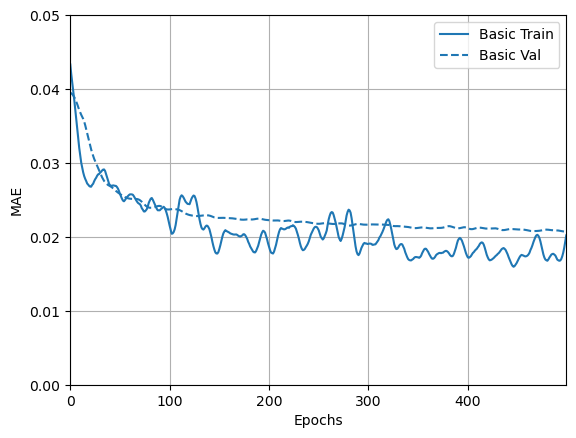

In [42]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2) 
plotter.plot({'Basic': history}, metric = "mae") 
plt.ylim([0, 0.05]) 
plt.ylabel('MAE') 

Text(0, 0.5, 'MSE')

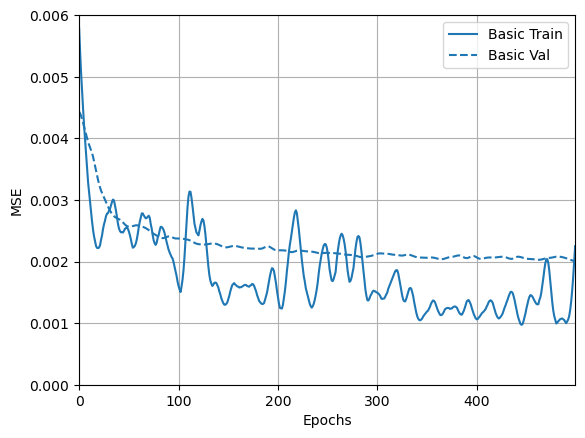

In [43]:
plotter.plot({'Basic': history}, metric = "mse") 
plt.ylim([0, 0.006]) 
plt.ylabel('MSE')

In [44]:
print('Error Rate on Train Split: ') 
loss, mae, mse = model.evaluate(x_train, y_train, verbose=2) 

print("Train set Mean Abs Error    : {:.8f}".format(mae)) 
print("Train set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Train Split: 
1627/1627 - 5s - 3ms/step - loss: 0.0012 - mae: 0.0177 - mse: 0.0012
Train set Mean Abs Error    : 0.01767263
Train set Mean Squared Error: 0.00123252


In [45]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse = model.evaluate(x_val, y_val, verbose=2)

print("Validation set Mean Abs Error     : {:.8f}".format(mae))
print("Validation set Mean Squared Error: {:.8f}".format(mse))

Error Rate on Evaluation Split: 
204/204 - 1s - 3ms/step - loss: 0.0020 - mae: 0.0208 - mse: 0.0020
Validation set Mean Abs Error     : 0.02082125
Validation set Mean Squared Error: 0.00198188


**Hyperparameters tuning** 

In [48]:
from keras_tuner import BayesianOptimization 
from tensorflow.keras.callbacks import EarlyStopping 

In [47]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [kt-legacy]
   ---------------------------------------- 0/2 [kt-legacy]
   ---------------------------------------- 0/2 [kt-legacy]
   ---------------------------------------- 0/2 [kt-legacy]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]

In [49]:
def build_model(hp):
    model = Sequential([
         Input(shape=(x_train.shape[1],)),
    ])
    
    num_layers = hp.Int('num_layers', 3, 6)
    # Hyperparameter: Number of dense layers
    for i in range(num_layers): # Tuning the number of layers between 2 and 6
        units = hp.Int('units_' + str(i), min_value=128, max_value=512, step=32) # Units per layer
        activation = hp.Choice('activation_' + str(i), ['swish', 'relu', 'leaky_relu'])
        
       # Add Dense layer with specified units and activation
        model.add(Dense(units, activation=activation, kernel_initializer='he_uniform'))

    model.add(Dense(3, activation='linear'))
    
    # Hyperparameter: Learning rate choices
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
    loss='mse',
    metrics=['mae', 'mse'])
    return model

In [50]:
tuner = BayesianOptimization( 
     build_model, 
     objective='val_mse', 
     num_initial_points=30, 
     max_trials=10, 
     directory='directory_dnn_building_model_on_tuner', 
     project_name='hyperparameters_tuning_dnn') 

In [51]:
early_stopping_callback = EarlyStopping(monitor='val_mse', patience=10)

tuner.search(x_train,
            y_train,
            epochs=500,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping_callback, tfdocs.modeling.EpochDots()])

Trial 10 Complete [00h 11m 40s]
val_mse: 0.0027563238982111216

Best val_mse So Far: 0.0021361473482102156
Total elapsed time: 02h 36m 47s


In [52]:
tuner.results_summary()

Results summary
Results in directory_dnn_building_model_on_tuner\hyperparameters_tuning_dnn
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 03 summary
Hyperparameters:
num_layers: 5
units_0: 256
activation_0: relu
units_1: 192
activation_1: relu
units_2: 480
activation_2: relu
learning_rate: 0.0001
units_3: 352
activation_3: relu
units_4: 288
activation_4: relu
Score: 0.0021361473482102156

Trial 08 summary
Hyperparameters:
num_layers: 4
units_0: 416
activation_0: relu
units_1: 512
activation_1: relu
units_2: 320
activation_2: relu
learning_rate: 0.001
units_3: 224
activation_3: relu
units_4: 416
activation_4: relu
units_5: 128
activation_5: swish
Score: 0.0022303368896245956

Trial 00 summary
Hyperparameters:
num_layers: 4
units_0: 288
activation_0: relu
units_1: 416
activation_1: relu
units_2: 224
activation_2: swish
learning_rate: 0.001
units_3: 128
activation_3: swish
Score: 0.002233492908999324

Trial 02 summary
Hyperparameters:
num_layers: 4
units_0: 512


In [53]:
# Extract the best hyperparameters 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] 
# Build the model with the best hyperparameters 
best_hps_model = tuner.hypermodel.build(best_hps)

In [54]:
print(best_hps_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 192)                 │          49,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 480)                 │          92,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 352)                 │         169,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 288)                 │         101,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418,179 (1.60 MB)

 Trainable params: 418,179 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
# file path for saving the best model 
checkpoint_path = "./models/best_model.keras" 

# ModelCheckpoint callback to save the best model 
ckpt_callback = ModelCheckpoint( 
    filepath=checkpoint_path,   
    monitor='val_mse',   
    save_best_only=True,  # Save only the best model 
    save_weights_only=False,  # Save the entire model  
    verbose=0)

In [56]:
# Rebuild the model with the best hyperparameters

history = best_hps_model.fit(
    x_train,
    y_train,
    batch_size=34,
    epochs=500,
    verbose=0,
    validation_data=(x_val, y_val),
    callbacks=[ckpt_callback, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0111,  mae:0.0518,  mse:0.0111,  val_loss:0.0064,  val_mae:0.0497,  val_mse:0.0064,  
...................................................................................................
Epoch: 100, loss:0.0015,  mae:0.0194,  mse:0.0015,  val_loss:0.0020,  val_mae:0.0211,  val_mse:0.0020,  
...................................................................................................
Epoch: 200, loss:0.0011,  mae:0.0167,  mse:0.0011,  val_loss:0.0021,  val_mae:0.0211,  val_mse:0.0021,  
...................................................................................................
Epoch: 300, loss:0.0009,  mae:0.0150,  mse:0.0009,  val_loss:0.0020,  val_mae:0.0201,  val_mse:0.0020,  
...................................................................................................
Epoch: 400, loss:0.0007,  mae:0.0138,  mse:0.0007,  val_loss:0.0020,  val_mae:0.0202,  val_mse:0.0020,  
............................................................................

Text(0, 0.5, 'MAE')

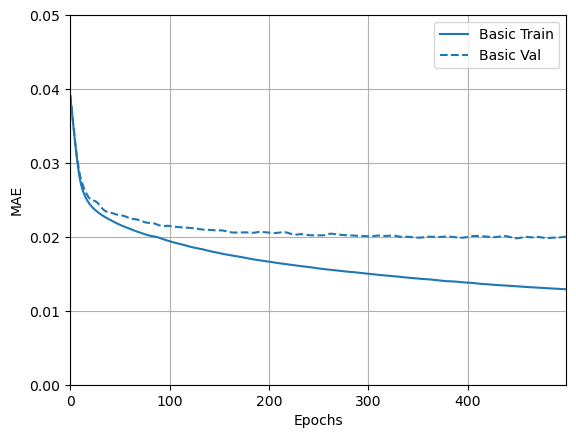

In [57]:
plotter.plot({'Basic': history}, metric = "mae") 
plt.ylim([0, 0.05]) 
plt.ylabel('MAE') 

Text(0, 0.5, 'MSE')

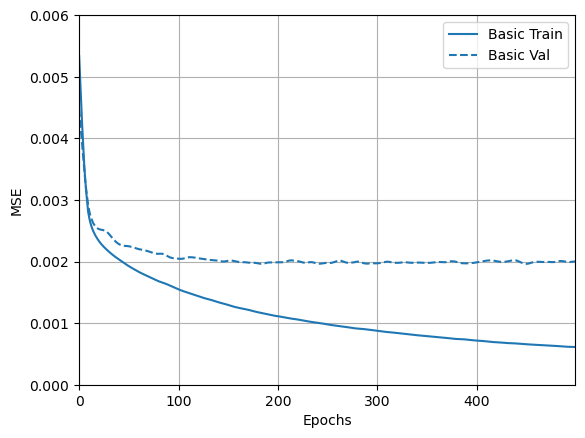

In [58]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.006])
plt.ylabel('MSE')

**Final model loading and evaluating**

In [59]:
# Load the saved model
try:
    final_model = load_model(checkpoint_path) # Load the complete model
    print("Model loaded successfully!")
    final_model.summary() # Display the model's summary
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 192)                 │          49,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 480)                 │          92,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 352)                 │         169,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 288)                 │         101,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,254,539 (4.79 MB)

 Trainable params: 418,179 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 836,360 (3.19 MB)

In [60]:
print('Error Rate on Train Split: ') 
loss, mae, mse = final_model.evaluate(x_train,y_train,verbose=2) 
print("Train set Mean Abs Error    : {:.5f}".format(mae)) 
print("Train set Mean Squared Error: {:.5f}".format(mse))

Error Rate on Train Split: 
1627/1627 - 7s - 5ms/step - loss: 9.3398e-04 - mae: 0.0153 - mse: 9.3398e-04
Train set Mean Abs Error    : 0.01531
Train set Mean Squared Error: 0.00093


In [61]:
print('Error Rate on Evaluation Split: ') 
loss, mae, mse = final_model.evaluate(x_val, y_val, verbose=2) 
print("Validation set Mean Abs Error    : {:.6f}".format(mae)) 
print("Validation set Mean Squared Error: {:.6f}".format(mse))

Error Rate on Evaluation Split: 
204/204 - 1s - 4ms/step - loss: 0.0019 - mae: 0.0197 - mse: 0.0019
Validation set Mean Abs Error    : 0.019722
Validation set Mean Squared Error: 0.001869


In [62]:
print('Error Rate on Test Split: ') 
loss, mae, mse = final_model.evaluate(x_test, y_test, verbose=2) 
print("Testing set Mean Abs Error    : {:.6f}".format(mae)) 
print("Testing set Mean Squared Error: {:.6f}".format(mse))

Error Rate on Test Split: 
204/204 - 1s - 6ms/step - loss: 0.0017 - mae: 0.0188 - mse: 0.0017
Testing set Mean Abs Error    : 0.018809
Testing set Mean Squared Error: 0.001658


**Predictions and visualization analysis** 

In [63]:
def print_predictions(y_true, y_pred, count): 
    
    # DataFrame to display the actual and predicted values 
    prediction_df = y_true.copy()   
    # Assign predicted values to new columns 
    prediction_df['Y1_pred'] = y_pred[:, 0] 
    prediction_df['Y2_pred'] = y_pred[:, 1] 
    prediction_df['Y3_pred'] = y_pred[:, 2] 
    
     # Display the predictions 
    print("Predictions:") 
    print(prediction_df.head(count).to_markdown(index=False))
    
predictions = final_model.predict(x_test) 
print() 
print_predictions(y_test,predictions, count=20)

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   

Predictions:
|       cm5 |       esp |      npa |     Y1_pred |    Y2_pred |     Y3_pred |
|----------:|----------:|---------:|------------:|-----------:|------------:|
|  0.095283 |  0.008926 |  0.18915 |  0.0960456  | -0.0103091 |  0.206509   |
|  0.087843 |  0.071522 |  0.20395 |  0.0922395  |  0.0871524 |  0.213772   |
| -0.232832 | -0.331418 | -0.62458 | -0.234155   | -0.350282  | -0.634333   |
|  0.081917 |  0.04205  |  0.20945 |  0.0814194  |  0.0396162 |  0.205968   |
|  0.083519 |  0.0372   |  0.20528 |  0.0826661  |  0.0205216 |  0.204575   |
| -0.078285 |  0.143152 | -0.24926 | -0.0856286  |  0.14506   | -0.218024   |
| -0.229353 | -0.344366 | -0.62066 | -0.232342   | -0.340656  | -0.624413   |
|  0.119023 |  0.054332 |  0.21472 |  0.110034   |  0.0194674 |  0.191644   |
|  0.077737 |  0.051229 |  0.20246 |  0.0792634  |  0.0507348 |  0.201283   |
|  0.076568 |  0.057256 |  0.19471 |  0.0793472  |  0.0587591 |  0.205815   |
|  0.1

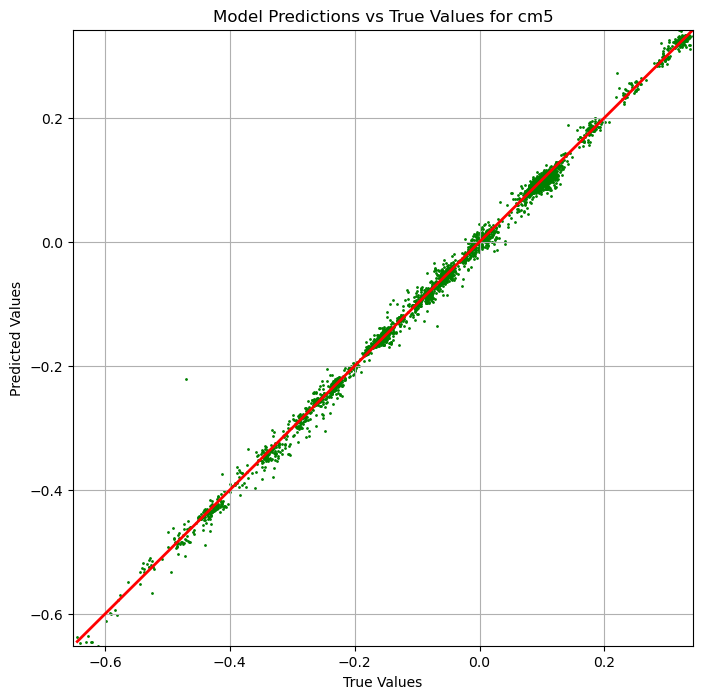

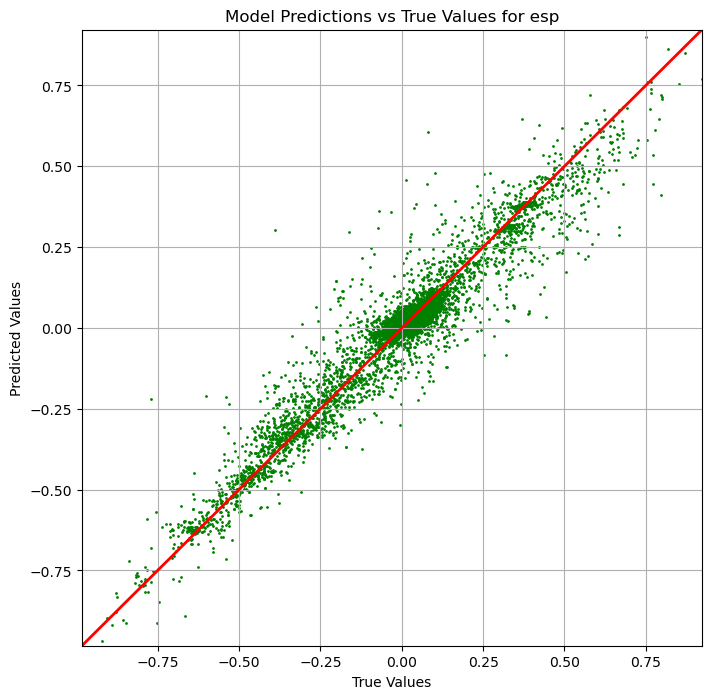

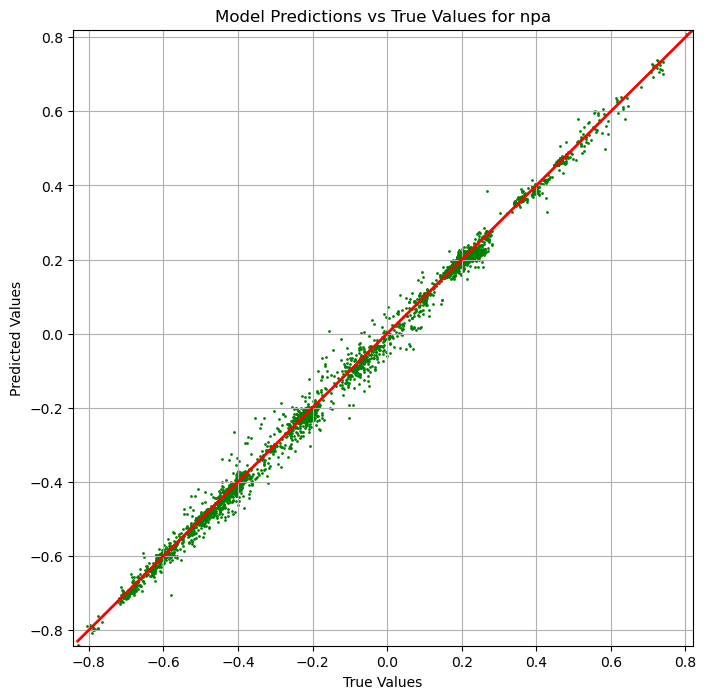

In [64]:
#  create scatter plots 

if not isinstance(y_test, pd.DataFrame):
    y_test = pd.DataFrame(y_test, columns=['Y1', 'Y2', 'Y3'])
    # Iterate over each target variable and create plots
for i, column in enumerate(y_test.columns):
    plt.figure(figsize=(8, 8))
    true_values = y_test[column]
    predicted_values = predictions[:, i]
    plt.scatter(true_values, predicted_values, s=1, color='green')
    plt.title(f"Model Predictions vs True Values for {column}")
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.xlim([min(true_values.min(), predicted_values.min()), max(true_values.max(), predicted_values.max())])
    plt.ylim([min(true_values.min(), predicted_values.min()), max(true_values.max(), predicted_values.max())])
    plt.plot([true_values.min(), true_values.max()], [true_values.min(),true_values.max()], 'r', lw=2)
    plt.grid(True)
    plt.show()

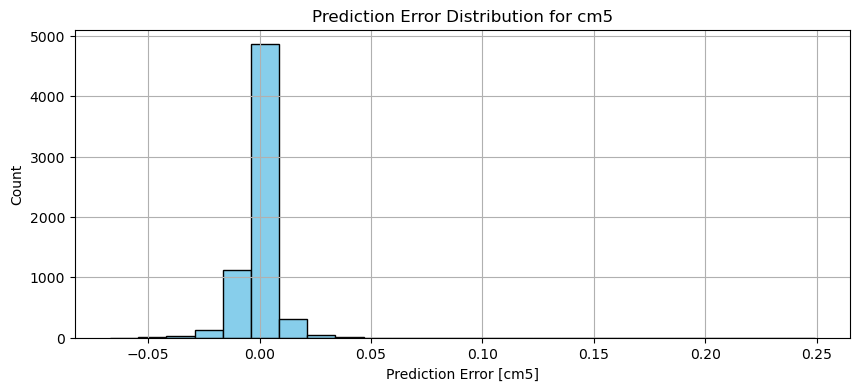

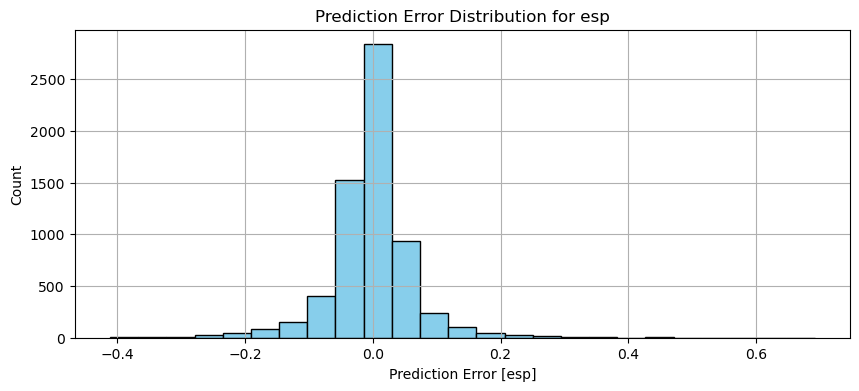

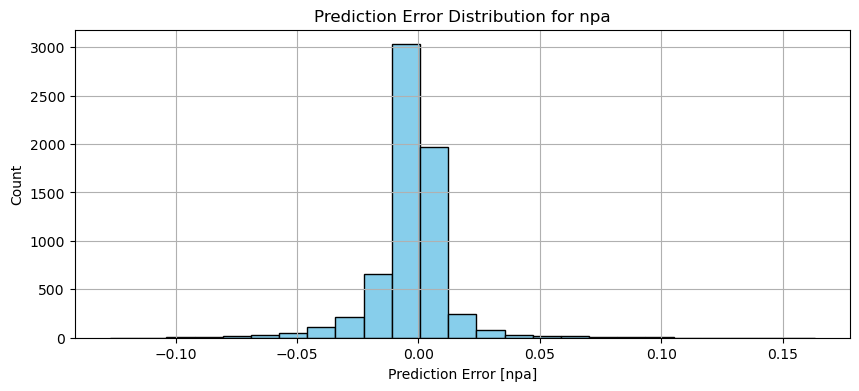

In [65]:
# error distribution. 
if not isinstance(y_test, pd.DataFrame): 
    y_test = pd.DataFrame(y_test, columns=['Y1', 'Y2', 'Y3']) 
# Calculate errors and plot histograms for each target variable 
for i, column in enumerate(y_test.columns): 
    plt.figure(figsize=(10, 4))    
    # Calculate the error 
    true_values = y_test[column] 
    predicted_values = predictions[:, i] 
    errors = predicted_values - true_values     
    # Plotting the error distribution 
    plt.hist(errors, bins=25, color='skyblue', edgecolor='black') 
    plt.title(f"Prediction Error Distribution for {column}") 
    plt.xlabel(f"Prediction Error [{column}]") 
    plt.ylabel("Count") 
    plt.grid(True) 
    plt.show()